In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Housing.csv")

In [6]:
data1 = data[["area", "price"]]

In [7]:
inp = data['area']

In [8]:
out = data["price"]

In [11]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data1_sc =minmax.fit_transform(data1)

C:\Users\Alwin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
data1_sc = pd.DataFrame(data1_sc)
data1_sc.columns = data1.columns

In [15]:
data1_sc.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data1_sc["area"], data1_sc["price"], test_size = 0.3, random_state = 48)

In [22]:
xtrain = xtrain.values.reshape(-1,1)

In [18]:
xtrain.shape

(381, 1)

In [23]:
xtest = xtest.values.reshape(-1,1)

In [24]:
xtest.shape

(164, 1)

In [47]:
from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod = lin_mod.fit(xtrain,ytrain)
ypred_lin = lin_mod.predict(xtrain)
ypred_Lin = lin_mod.predict(xtest)

In [27]:
ypred_lin

array([0.17186721, 0.22222665, 0.20246535, 0.32018319, 0.26047432,
       0.18334151, 0.3414319 , 0.21691447, 0.28788516, 0.28618526,
       0.39242881, 0.13935668, 0.29468474, 0.32932014, 0.27768578,
       0.24368784, 0.21818939, 0.21776442, 0.21181478, 0.20289032,
       0.31338361, 0.21818939, 0.21393965, 0.49442261, 0.19609073,
       0.18691129, 0.24368784, 0.20374027, 0.17569197, 0.17569197,
       0.25898691, 0.3184833 , 0.20119043, 0.49442261, 0.21988929,
       0.25643707, 0.33505729, 0.19481581, 0.30097436, 0.19354089,
       0.3168259 , 0.46722426, 0.32443294, 0.20799001, 0.20756504,
       0.30318423, 0.4846057 , 0.23306349, 0.17569197, 0.30318423,
       0.2394381 , 0.21138981, 0.15019352, 0.19694068, 0.19524079,
       0.29587467, 0.34568165, 0.30743397, 0.32613283, 0.30318423,
       0.21181478, 0.22498898, 0.16294275, 0.25303727, 0.32655781,
       0.20544017, 0.24368784, 0.30148433, 0.5982863 , 0.20289032,
       0.20629012, 0.33378237, 0.30318423, 0.35214125, 0.20289

In [35]:
ypred_Lin

array([0.17186721, 0.22222665, 0.20246535, 0.32018319, 0.26047432,
       0.18334151, 0.3414319 , 0.21691447, 0.28788516, 0.28618526,
       0.39242881, 0.13935668, 0.29468474, 0.32932014, 0.27768578,
       0.24368784, 0.21818939, 0.21776442, 0.21181478, 0.20289032,
       0.31338361, 0.21818939, 0.21393965, 0.49442261, 0.19609073,
       0.18691129, 0.24368784, 0.20374027, 0.17569197, 0.17569197,
       0.25898691, 0.3184833 , 0.20119043, 0.49442261, 0.21988929,
       0.25643707, 0.33505729, 0.19481581, 0.30097436, 0.19354089,
       0.3168259 , 0.46722426, 0.32443294, 0.20799001, 0.20756504,
       0.30318423, 0.4846057 , 0.23306349, 0.17569197, 0.30318423,
       0.2394381 , 0.21138981, 0.15019352, 0.19694068, 0.19524079,
       0.29587467, 0.34568165, 0.30743397, 0.32613283, 0.30318423,
       0.21181478, 0.22498898, 0.16294275, 0.25303727, 0.32655781,
       0.20544017, 0.24368784, 0.30148433, 0.5982863 , 0.20289032,
       0.20629012, 0.33378237, 0.30318423, 0.35214125, 0.20289

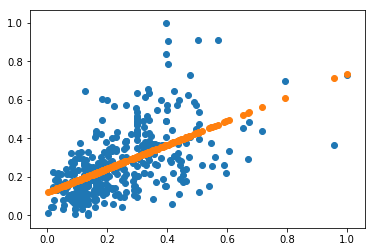

In [36]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.scatter(xtrain,ytrain)
plt.scatter(xtrain,ypred_lin)

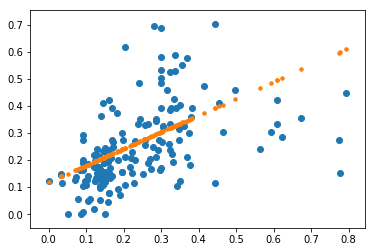

In [38]:
plt.scatter(xtest,ytest)
plt.scatter(xtest,ypred_Lin, s=12)

In [40]:
from sklearn.metrics import r2_score
r2_train=r2_score(ytrain,ypred_lin)
r2_test = r2_score(ytest,ypred_Lin)
print(r2_train)
print(r2_test)

0.30823844185143434
0.2025012227687898


In [49]:
lin_mod.coef_

array([0.61833743])

In [51]:
lin_mod.intercept_

0.11832046019162934

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [53]:
poly_model = make_pipeline(PolynomialFeatures(4),LinearRegression())

In [55]:
poly_model.fit(xtrain,ytrain)
pm_ypred_lin=poly_model.predict(xtrain)
pm_ypred_Lin = poly_model.predict(xtest)

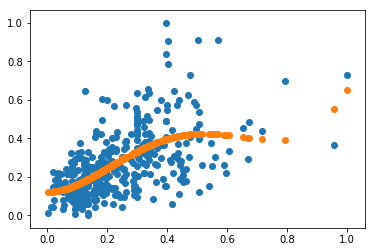

In [57]:
plt.scatter(xtrain,ytrain)
plt.scatter(xtrain,pm_ypred_lin)

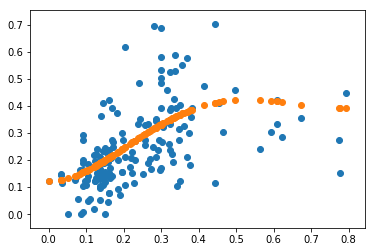

In [58]:
plt.scatter(xtest,ytest)
plt.scatter(xtest,pm_ypred_Lin)

In [61]:
r2_test1 = r2_score(ytest,pm_ypred_Lin)
print(r2_train1)

0.34379170498997713


In [62]:
r2_train1 = r2_score(ytrain,pm_ypred_lin)
print(r2_train1)

0.3385573435853586


In [63]:
poly_model.steps[1][1].coef_

array([  0.        ,  -0.03081351,   5.13804954, -10.89902717,
         6.32112749])

In [64]:
poly_model.steps[1][1].intercept_

0.12176848036481347

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)